In [1]:
import pandas as pd 
import numpy as np
train = pd.read_csv('House_Rent_Dataset.csv')
train.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [2]:
train = train.drop(['Posted On','Floor','Area Locality'],axis = 1)
train.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
def category(df,column):
    return df[column].value_counts()
category(train,'City'),category(train,'Area Type'),category(train,'City'),category(train,'Furnishing Status'),category(train,'Point of Contact'),category(train,'Tenant Preferred')


(Mumbai       972
 Chennai      891
 Bangalore    886
 Hyderabad    868
 Delhi        605
 Kolkata      524
 Name: City, dtype: int64,
 Super Area     2446
 Carpet Area    2298
 Built Area        2
 Name: Area Type, dtype: int64,
 Mumbai       972
 Chennai      891
 Bangalore    886
 Hyderabad    868
 Delhi        605
 Kolkata      524
 Name: City, dtype: int64,
 Semi-Furnished    2251
 Unfurnished       1815
 Furnished          680
 Name: Furnishing Status, dtype: int64,
 Contact Owner      3216
 Contact Agent      1529
 Contact Builder       1
 Name: Point of Contact, dtype: int64,
 Bachelors/Family    3444
 Bachelors            830
 Family               472
 Name: Tenant Preferred, dtype: int64)

One Hot Encoding (L-57, regression module)

In [4]:
import regression as reg
features = ['City','Area Type','Furnishing Status','Point of Contact','Tenant Preferred']
for i in features:
    train = reg.Data_Cleaning.one_hot_encode(train,i)
train.replace(to_replace = ["Built Area","Contact Builder"],value = ["Super Area","Contact Owner"],inplace = True)


In [5]:
def meanNormalization(df,column):
    df[column] = (df[column] - df[column].mean())/df[column].std()
    return df
meanNormalization(train,'Size'),meanNormalization(train,'BHK'),meanNormalization(train,'Bathroom')
train.head()

,BHK,Rent,Size,Bathroom,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Carpet Area,Super Area,Semi-Furnished,Unfurnished,Contact Builder,Contact Owner,Bachelors/Family,Family
0,-0.100762,10000,0.208938,0.038590,0,0,0,1,0,0,1,0,1,0,1,1,0
1,-0.100762,20000,-0.264097,-1.091952,0,0,0,1,0,0,1,1,0,0,1,1,0
2,-0.100762,17000,0.051260,-1.091952,0,0,0,1,0,0,1,1,0,0,1,1,0
3,-0.100762,10000,-0.264097,-1.091952,0,0,0,1,0,0,1,0,1,0,1,1,0
4,-0.100762,7500,-0.185257,-1.091952,0,0,0,1,0,1,0,0,1,0,1,0,0


In [6]:
X = train.drop(['Rent'],axis = 1)
y = train['Rent']
X = np.array(X)
y = np.array(y)
y = y.reshape(-1,1)

In [7]:
ones = np.ones([len(X),1])
X = np.concatenate((ones,X),axis = 1)
X.shape

(4746, 17)

adding polynomial features as cost function is very high

In [8]:
theta = np.zeros([17,1])
y = (y - y.mean())/y.std()
y


array([[-3.20026025e-01],
       [-1.91982074e-01],
       [-2.30395259e-01],
       ...,
       [ 8.38517907e-05],
       [ 1.28127802e-01],
       [-2.56004050e-01]])

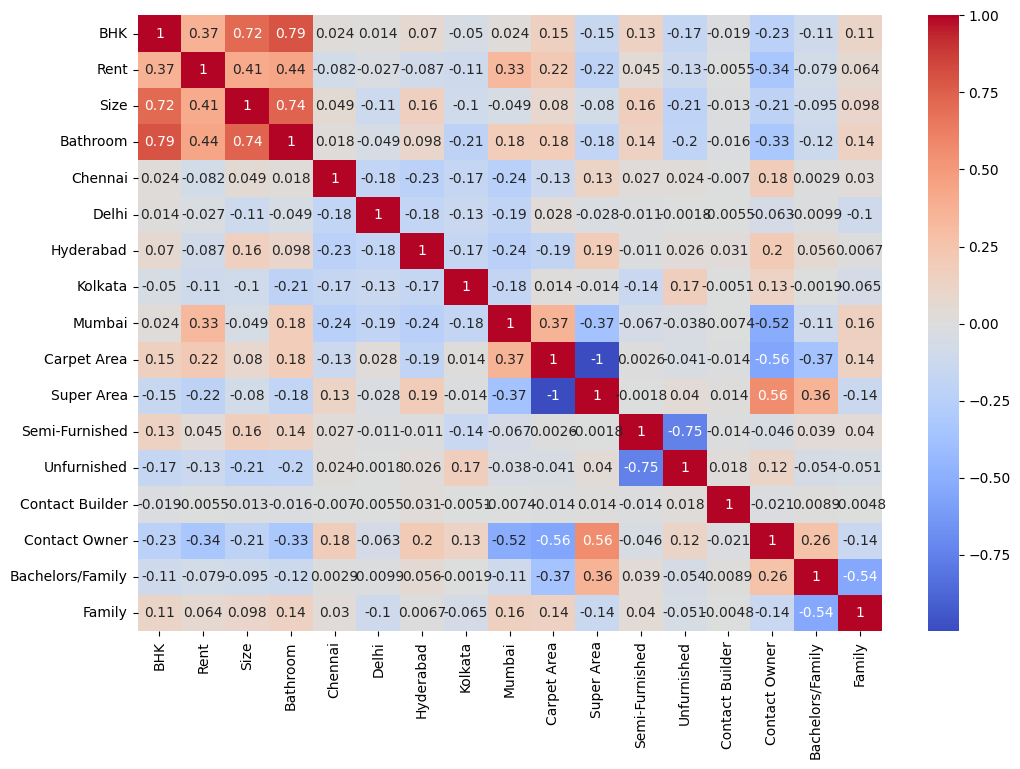

In [9]:
reg.Data_Plotting.correlation_plot(train)

In [10]:
reg.Linear_regression.gradient_descent(X,y,theta,0.01,100)

[3336.73880173]
[3317.92299891]
[3299.48777648]
[3281.43954878]
[3263.7847359]
[3246.52975606]
[3229.68101775]
[3213.2449114]
[3197.2278007]
[3181.63601363]
[3166.47583311]
[3151.75348732]
[3137.47513979]
[3123.64687913]
[3110.27470859]
[3097.36453539]
[3084.9221598]
[3072.95326415]
[3061.46340172]
[3050.45798549]
[3039.94227695]
[3029.92137486]
[3020.40020416]
[3011.38350487]
[3002.87582133]
[2994.88149148]
[2987.40463653]
[2980.44915097]
[2974.01869285]
[2968.11667461]
[2962.74625432]
[2957.91032752]
[2953.61151957]
[2949.8521787]
[2946.63436967]
[2943.95986822]
[2941.83015614]
[2940.24641726]
[2939.20953414]
[2938.72008563]
[2938.77834526]
[2939.38428045]
[2940.53755265]
[2942.23751823]
[2944.4832303]
[2947.27344136]
[2950.6066067]
[2954.48088869]
[2958.89416176]
[2963.84401818]
[2969.3277745]
[2975.3424787]
[2981.88491786]
[2988.95162657]
[2996.53889568]
[3004.64278167]
[3013.25911635]
[3022.383517]
[3032.01139678]
[3042.13797538]
[3052.75828999]
[3063.86720627]
[3075.45942958]
[30

array([[-1.22209916e-16],
       [ 3.69678622e-01],
       [ 4.13507188e-01],
       [ 4.41168744e-01],
       [-3.21620966e-02],
       [-9.02873901e-03],
       [-3.38119497e-02],
       [-3.30078675e-02],
       [ 1.31979093e-01],
       [ 1.07830599e-01],
       [-1.07698436e-01],
       [ 2.26242925e-02],
       [-6.13651717e-02],
       [-7.95713870e-05],
       [-1.58687656e-01],
       [-3.51472723e-02],
       [ 1.91356153e-02]])

In [11]:
from sklearn.model_selection import train_test_split 

X = train.drop(['Rent'],axis = 1)
y = train['Rent']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)


In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [13]:
lin_reg.predict(x_test)

array([ 4.97073555e+04,  3.09815553e+04,  7.10969207e+03,  6.31148343e+03,
        5.95684434e+04,  2.28676654e+04,  3.23949293e+04,  5.42813222e+03,
        1.96551645e+04,  7.55352491e+04, -8.88082677e+03,  8.89233796e+04,
        3.17006910e+02,  3.50980637e+04,  1.02712548e+04,  1.82901085e+04,
        3.65502299e+02,  1.15735538e+04,  2.84286545e+04,  3.22375804e+03,
        6.33757095e+04,  2.08886559e+03,  1.69715246e+04,  1.34683017e+05,
       -3.96801951e+03,  7.62796254e+04,  1.06308675e+05,  6.54768773e+04,
        2.20839838e+04,  2.98014670e+04,  3.17006910e+02,  7.25525339e+04,
       -1.45716397e+04,  6.07288307e+04,  8.00770532e+04,  3.43122182e+04,
        1.43753548e+04,  2.17866562e+04,  2.60912983e+04, -6.32227484e+03,
        1.13741134e+04,  1.22084542e+04,  3.46048903e+04, -8.59635682e+03,
        1.69715246e+04,  6.52804037e+04,  4.82919343e+04, -4.99343763e+03,
        6.40199081e+04,  9.44288685e+04, -6.00162185e+01,  1.72799637e+05,
        1.08260702e+05,  

In [14]:
from sklearn.metrics import mean_squared_error
housing_predictions  = lin_reg.predict(x_test)
lin_mse = mean_squared_error(y_test,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

122524.8318101481

too much error using linear regression model it is better to use some other models

In [15]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)
housing_predictions = tree_reg.predict(x_test)
lin_mse = mean_squared_error(y_test,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

113662.68231476023

In [16]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train,y_train)
housing_predictions = forest_reg.predict(x_test)
lin_mse = mean_squared_error(y_test,housing_predictions)
np.sqrt(lin_mse)

116048.96079810771